[Index](Index.ipynb) - [Back](2015_08_27_03_Presentation_Lab_Cylinder.ipynb) - [Next](2015_08_27_03_Presentation_Lab_Brain.ipynb)

# DE RENZO PHANTOM acquired on Siemens Biograph mMR

In [1]:
import occiput
from occiput.Reconstruction.PET.PET_scanners import Biograph_mMR
from occiput.DataSources.FileSources import import_interfile_volume

In [2]:
pet = occiput.Reconstruction.PET.PET_Static_Scan()

In [3]:
pet.set_scanner(Biograph_mMR)

In [4]:
pet.use_compression(False)

LOAD MEASUREMENT DATA - 10 MINS

In [5]:
listmode = 0
if (listmode == 1):
    pet.import_listmode('../../data/PET_data/scans/2015_05_20_deRenzo/listmode_and_sensitivity/PET_ACQ_1014_20150520090638-0.l.hdr')
    pet.export_prompts('../../data/PET_data/scans/2015_05_20_deRenzo/prompts.h5')
    pet.export_randoms('../../data/PET_data/scans/2015_05_20_deRenzo/randoms.h5')
else:
    pet.import_prompts('../../data/PET_data/scans/2015_05_20_deRenzo/prompts.h5')
    pet.import_randoms('../../data/PET_data/scans/2015_05_20_deRenzo/randoms.h5')

Uncompression done
Uncompression done


In [6]:
pet.use_compression(False)

In [7]:
# Import sensitivity
pet.import_sensitivity('../../data/PET_data/scans/2015_05_20_deRenzo/norm/norm3d_00.h33')

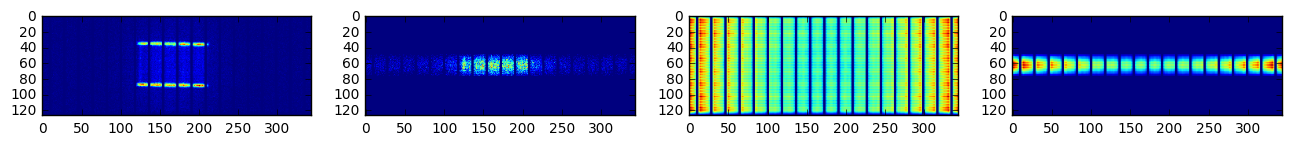

In [8]:
figure(figsize=[16,6])
subplot(1,4,1); imshow(pet.prompts.to_nd_array()[0,5,:,:].transpose())
subplot(1,4,2); imshow(pet.prompts.to_nd_array()[0,0,:,:].transpose())
subplot(1,4,3); imshow(pet.sensitivity.to_nd_array()[0,5,:,:].transpose())
subplot(1,4,4); imshow(pet.sensitivity.to_nd_array()[0,0,:,:].transpose())

In [9]:
#pet.set_activity_shape([128,128,128])
#pet.set_activity_size([128*pet.activity_size[0]/344.0,128*pet.activity_size[1]/344.0,128*pet.activity_size[2]/127.0])

ITERATIVE RECONSTRUCTION

In [10]:
activity_recon = pet.osem_reconstruction(iterations=63, attenuation=None, subset_mode="ordered_axial", subset_size=12)

0.0 / 100
Reconstructing
1.0 / 100
3.0 / 100
4.0 / 100
6.0 / 100
7.0 / 100
9.0 / 100
11.0 / 100
12.0 / 100
14.0 / 100
15.0 / 100
17.0 / 100
19.0 / 100
20.0 / 100
22.0 / 100
23.0 / 100
25.0 / 100
26.0 / 100
28.0 / 100
30.0 / 100
31.0 / 100
33.0 / 100
34.0 / 100
36.0 / 100
38.0 / 100
39.0 / 100
41.0 / 100
42.0 / 100
44.0 / 100
46.0 / 100
47.0 / 100
49.0 / 100
50.0 / 100
52.0 / 100
53.0 / 100
55.0 / 100
57.0 / 100
58.0 / 100
60.0 / 100
61.0 / 100
63.0 / 100
65.0 / 100
66.0 / 100
68.0 / 100
69.0 / 100
71.0 / 100
73.0 / 100
74.0 / 100
76.0 / 100
77.0 / 100
79.0 / 100
80.0 / 100
82.0 / 100
84.0 / 100
85.0 / 100
87.0 / 100
88.0 / 100
90.0 / 100
92.0 / 100
93.0 / 100
95.0 / 100
96.0 / 100
98.0 / 100
100.0 / 100
100.0 / 100


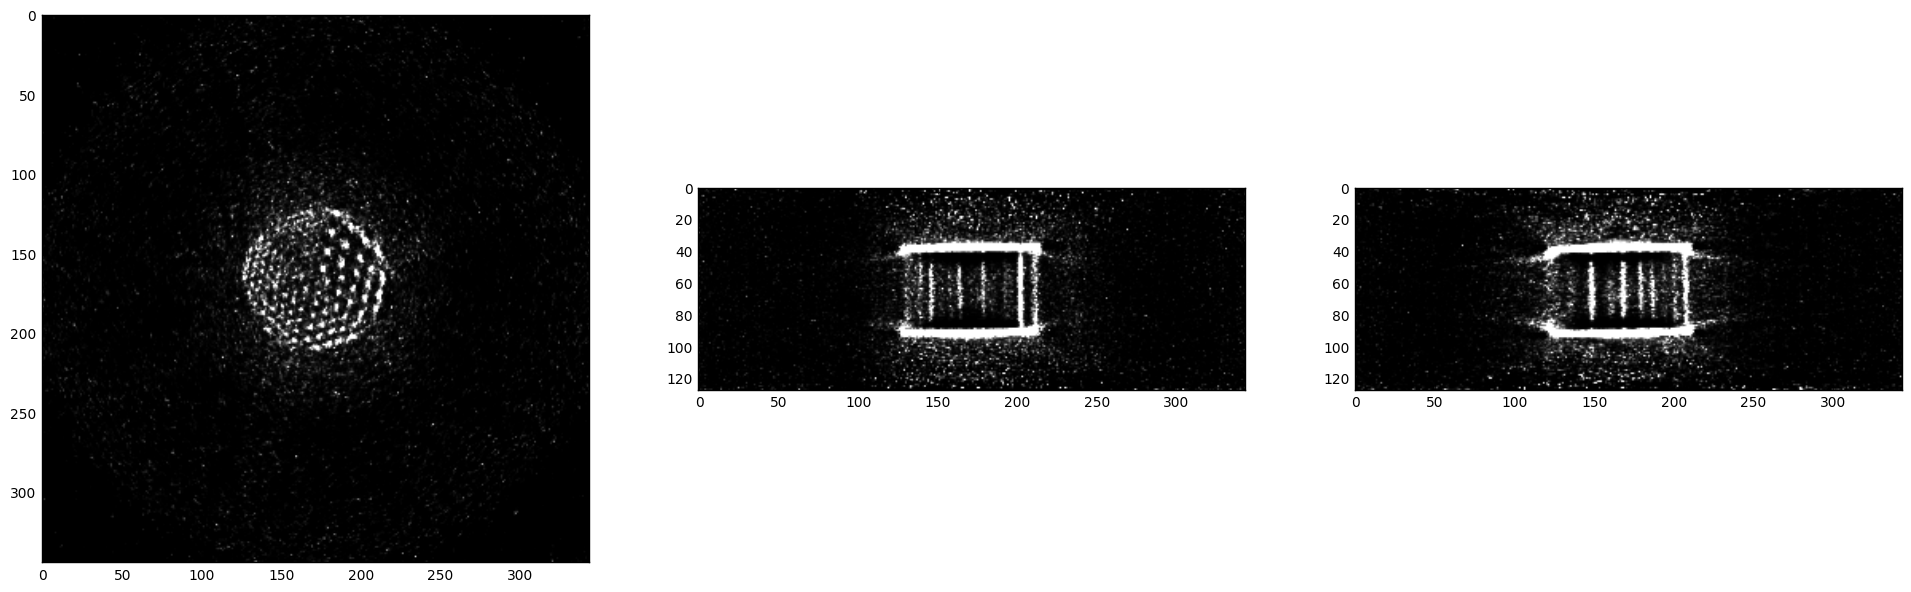

In [11]:
figure(figsize=[24,8])
subplot(1,3,1); imshow(activity_recon.data[:,:,64].transpose(), vmax = 0.01, cmap='gray')
subplot(1,3,2); imshow(activity_recon.data[:,178,:].transpose(),vmax = 0.01, cmap='gray')
subplot(1,3,3); imshow(activity_recon.data[178,:,:].transpose(),vmax = 0.01, cmap='gray')

In [12]:
#activity_recon.save_to_file('../../data/PET_data/scans/2015_05_20_derenzo/occiput/activity_recon.nii')

In [34]:
from occiput.DataSources.FileSources import import_interfile_volume
activity_recon_Siemens_no_corrections = import_interfile_volume('../../data/PET_data/scans/2015_05_20_deRenzo/recon_no_rand/recon__000_000.v.hdr')

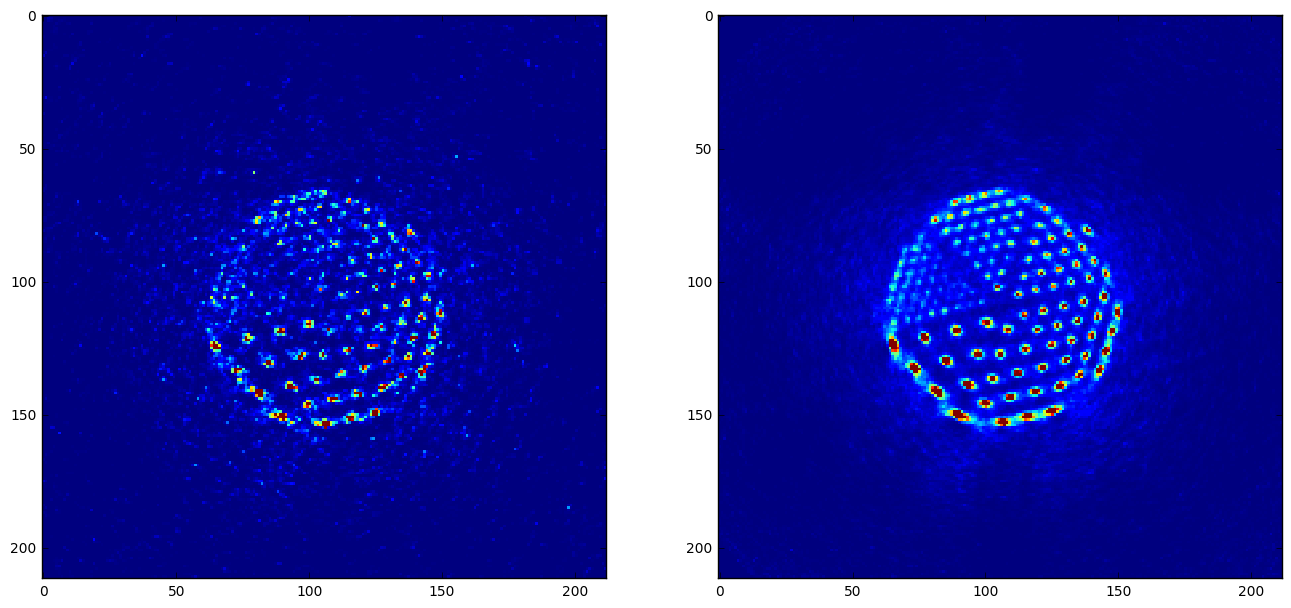

In [35]:
figure(figsize=[16,9])
subplot(1,2,1); imshow(activity_recon.data[60:272,60:272,64],vmax = 0.1/3, interpolation='nearest')
subplot(1,2,2); imshow(activity_recon_Siemens_no_corrections.data[60:272,60:272,64],vmax = 0.1, interpolation='nearest')

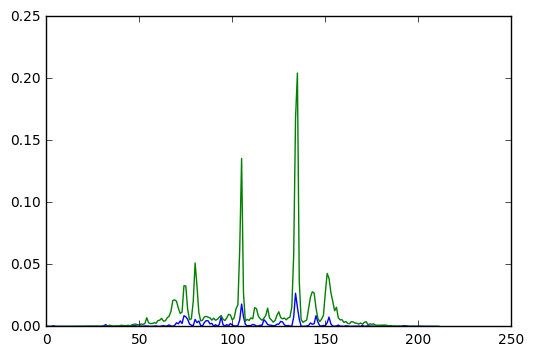

In [19]:
plot(activity_recon.data[60:272,172,64] )
plot(activity_recon_Siemens_no_corrections.data[60:272,172,64])

In [20]:
subset = zeros([11,252])
subset[5,:] = 1
activity_recon_axial = pet.osem_reconstruction(iterations=20, subsets_matrix=subset)

0.0 / 100
Reconstructing
5.0 / 100
10.0 / 100
15.0 / 100
20.0 / 100
25.0 / 100
30.0 / 100
35.0 / 100
40.0 / 100
45.0 / 100
50.0 / 100
55.0 / 100
60.0 / 100
65.0 / 100
70.0 / 100
75.0 / 100
80.0 / 100
85.0 / 100
90.0 / 100
95.0 / 100
100.0 / 100
100.0 / 100


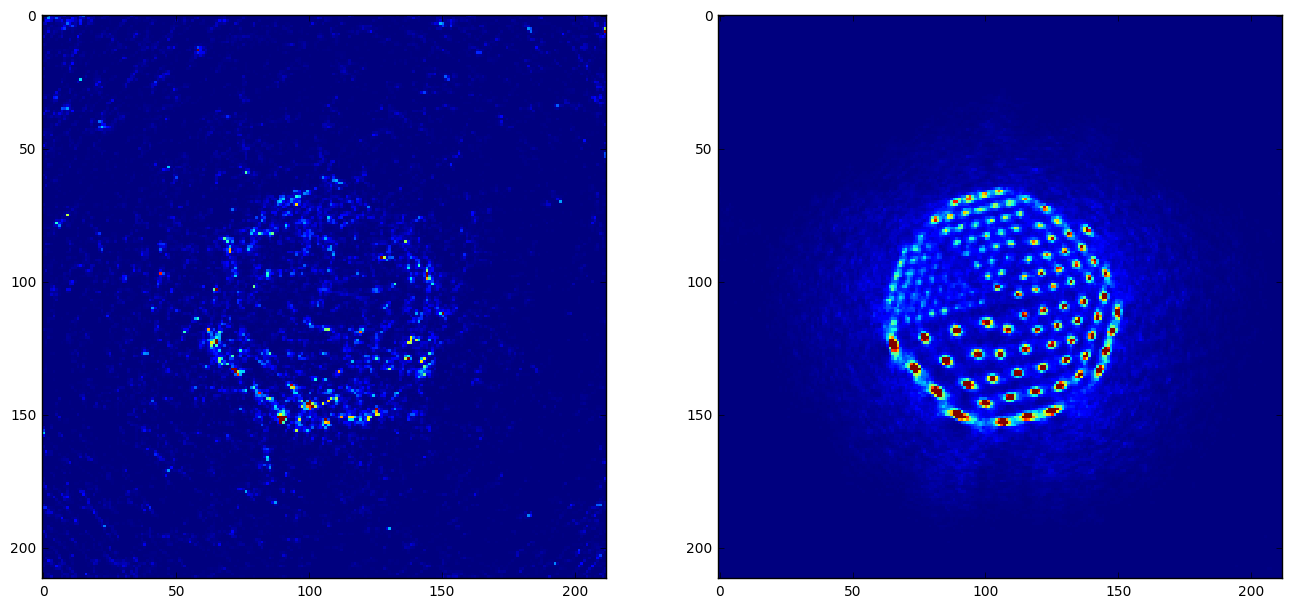

In [30]:
figure(figsize=[16,9])
subplot(1,2,1); imshow(activity_recon_axial.data[60:272,60:272,64],vmax = 0.1/100, interpolation='nearest')
subplot(1,2,2); imshow(activity_recon_Siemens_no_corrections.data[60:272,60:272,64],vmax = 0.1, interpolation='nearest')

In [22]:
pet.randoms = None
activity_recon_no_randoms = pet.osem_reconstruction(iterations=63, attenuation=None, subset_mode="ordered_axial", subset_size=12)

0.0 / 100
Reconstructing
1.0 / 100
3.0 / 100
4.0 / 100
6.0 / 100
7.0 / 100
9.0 / 100
11.0 / 100
12.0 / 100
14.0 / 100
15.0 / 100
17.0 / 100
19.0 / 100
20.0 / 100
22.0 / 100
23.0 / 100
25.0 / 100
26.0 / 100
28.0 / 100
30.0 / 100
31.0 / 100
33.0 / 100
34.0 / 100
36.0 / 100
38.0 / 100
39.0 / 100
41.0 / 100
42.0 / 100
44.0 / 100
46.0 / 100
47.0 / 100
49.0 / 100
50.0 / 100
52.0 / 100
53.0 / 100
55.0 / 100
57.0 / 100
58.0 / 100
60.0 / 100
61.0 / 100
63.0 / 100
65.0 / 100
66.0 / 100
68.0 / 100
69.0 / 100
71.0 / 100
73.0 / 100
74.0 / 100
76.0 / 100
77.0 / 100
79.0 / 100
80.0 / 100
82.0 / 100
84.0 / 100
85.0 / 100
87.0 / 100
88.0 / 100
90.0 / 100
92.0 / 100
93.0 / 100
95.0 / 100
96.0 / 100
98.0 / 100
100.0 / 100
100.0 / 100


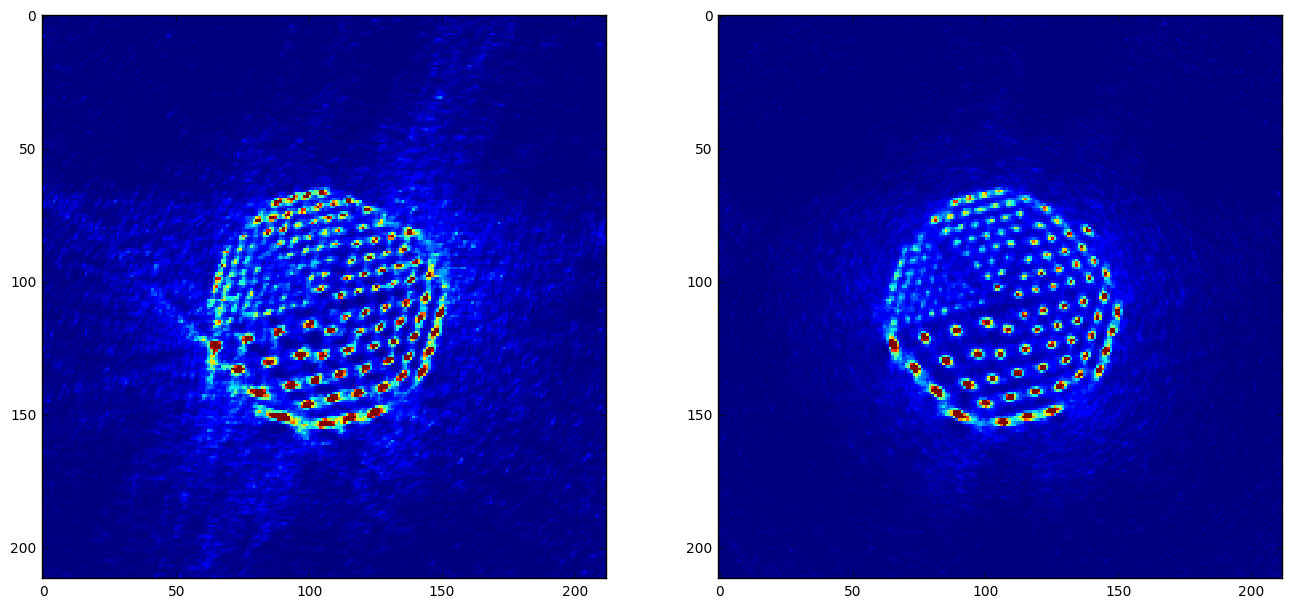

In [37]:
figure(figsize=[16,9])
subplot(1,2,1); imshow(activity_recon_no_randoms.data[60:272,60:272,64],vmax = 0.1/3, interpolation='nearest')
subplot(1,2,2); imshow(activity_recon_Siemens_no_corrections.data[60:272,60:272,64],vmax = 0.1, interpolation='nearest')

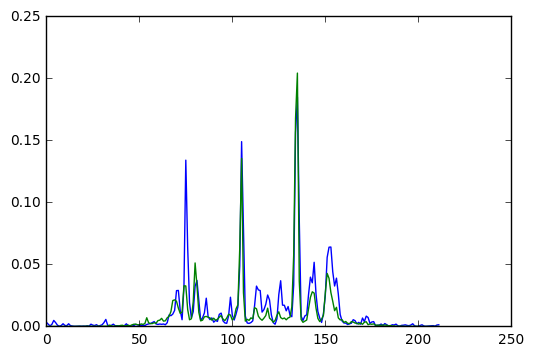

In [32]:
plot(activity_recon_no_randoms.data[60:272,172,64] *3)
plot(activity_recon_Siemens_no_corrections.data[60:272,172,64])

In [38]:
a1 = import_interfile_volume('../../data/PET_data/scans/2015_05_20_deRenzo/recon_no_rand/recon__000_000.v.hdr')
a2 = import_interfile_volume('../../data/PET_data/scans/2015_05_20_deRenzo/recon_no_att_3_21/recon__000_000.v.hdr')

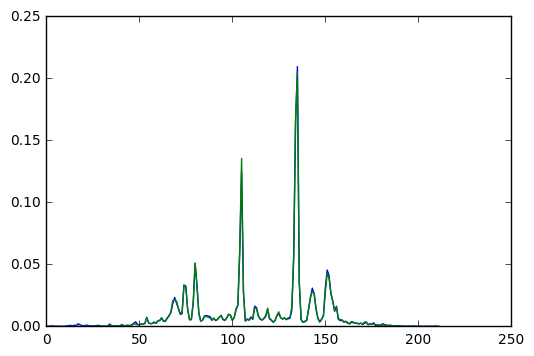

In [42]:
plot(a1.data[60:272,172,64])
plot(a2.data[60:272,172,64])

In [49]:
def mlem_step_origin(self, activity, attenuation_projection): 
    
    epsilon = 1e-08
    
    if self.sensitivity is not None: 
        sens_x_att  = self.sensitivity.data * attenuation_projection
    else: 
        sens_x_att   = attenuation_projection
    
    if self.randoms is not None: 
        mrandoms     = self.randoms.data / (sens_x_att + epsilon) 
        
    if self.scatter is not None: 
        mscatter     = (self.scatter.data + epsilon) / (attenuation_projection + epsilon)
    
    norm = self.backproject_activity(sens_x_att)
    projection = self.project_activity(self.activity)

    if self.randoms is not None: 
        if self.scatter is not None:
            update1 = self.backproject_activity(self.prompts.data/(projection.data + mrandoms + mscatter + epsilon)).data
        else: 
            update1 = self.backproject_activity(self.prompts.data/(projection.data + mrandoms + epsilon)).data
    
    else:
        if self.scatter is not None: 
            update1 = self.backproject_activity(self.prompts.data/(projection.data + mscatter + epsilon)).data
        else:
            update1 = self.backproject_activity(self.prompts.data/(projection.data + epsilon)).data

    
        
    self.activity = (self.activity /(norm.data+epsilon)) * update1
 
    return self.activity

In [50]:
n_iterations = 20
activity = ones(pet.activity_shape,dtype=float32,order="C")

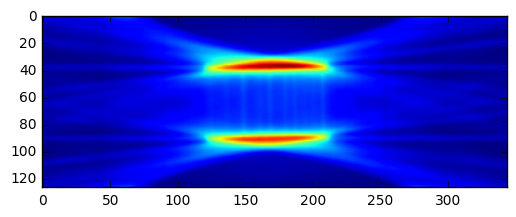

0


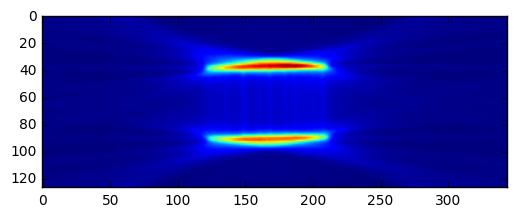

1


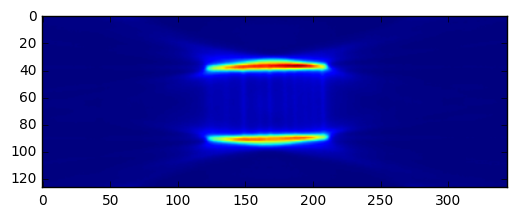

2


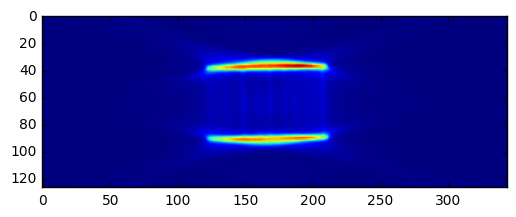

3


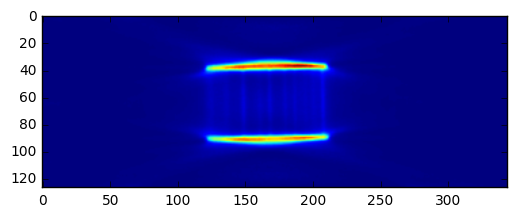

4


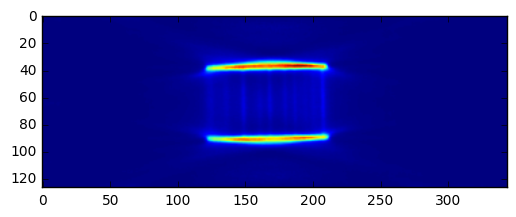

5


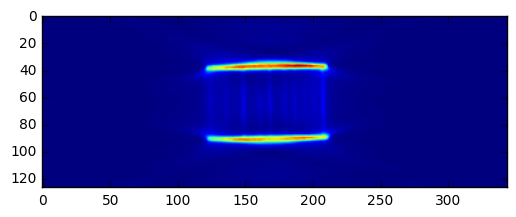

6


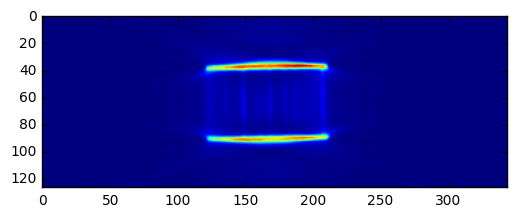

7


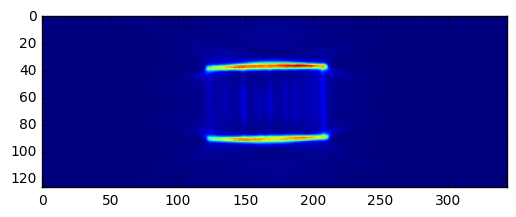

8


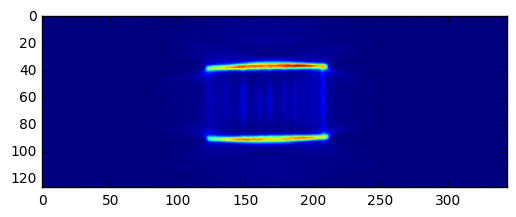

9


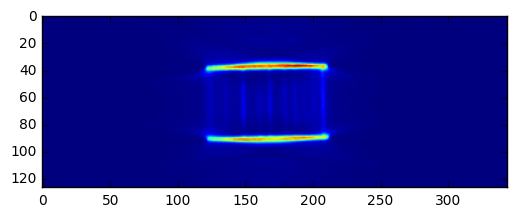

10


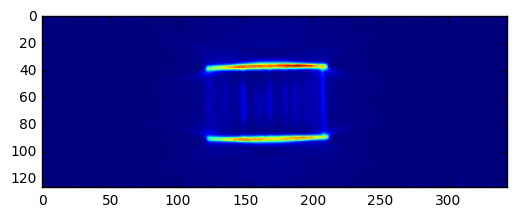

11


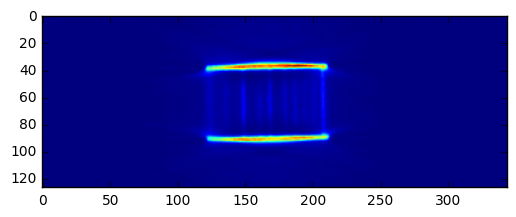

12


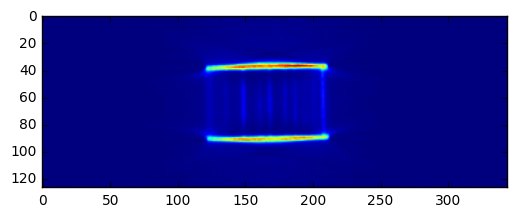

13


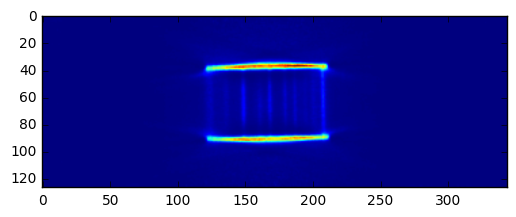

14


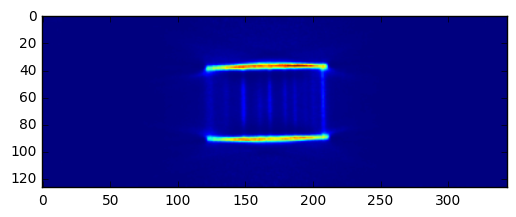

15


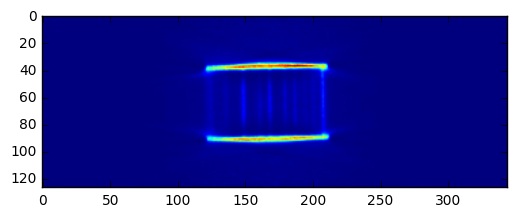

16


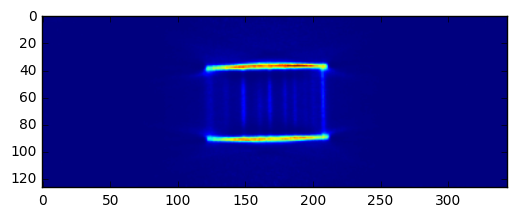

17


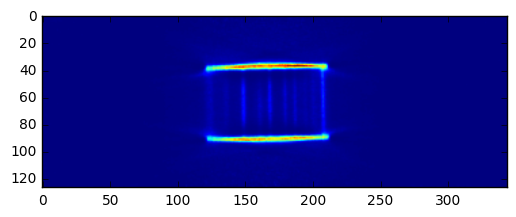

18


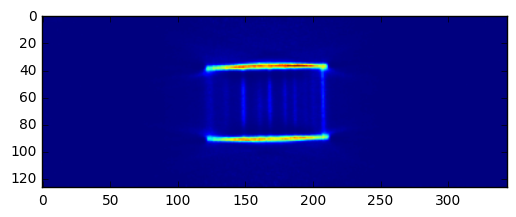

19


In [51]:
for i in range(n_iterations):
    activity = mlem_step_origin(pet, activity, attenuation_projection=1.0)
    plt.imshow((squeeze(activity[178,:,:])).transpose())
    plt.show() 
    print i 

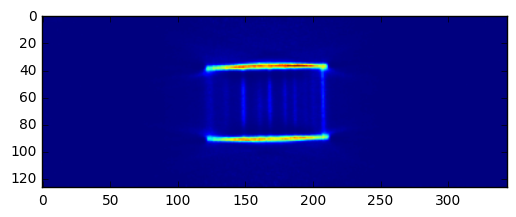

In [52]:
plt.imshow((squeeze(activity[178,:,:])).transpose())

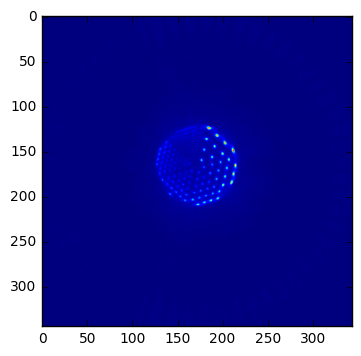

In [54]:
plt.imshow((squeeze(activity[:,:,64])).transpose())

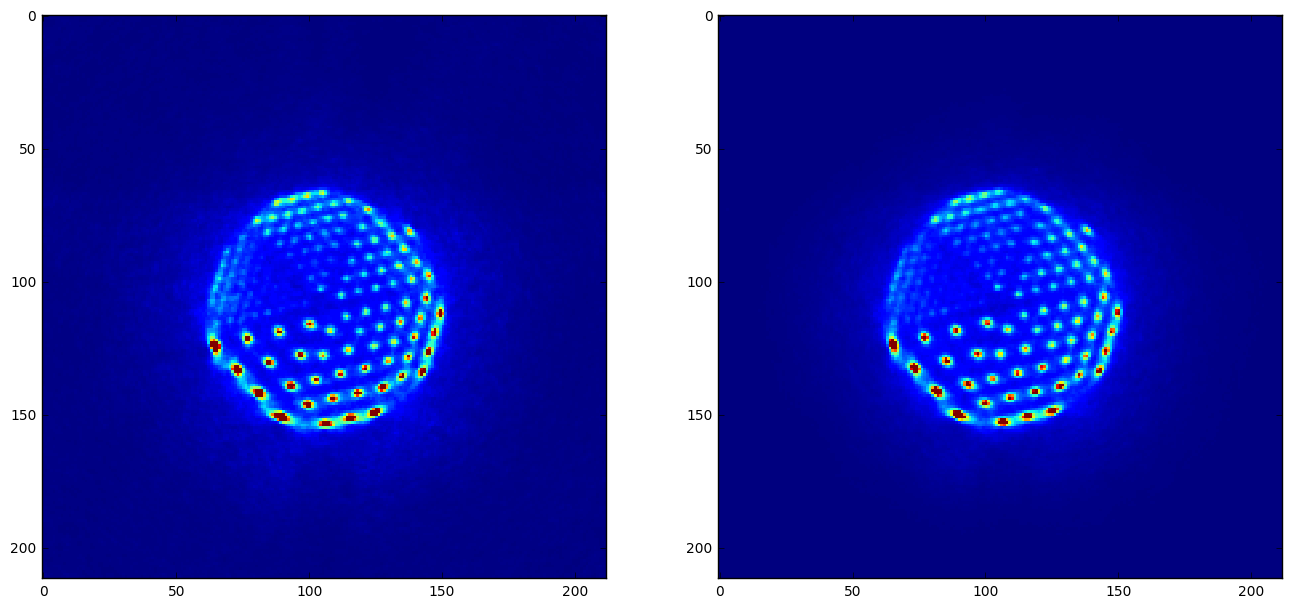

In [64]:
from occiput.DataSources.FileSources import import_interfile_volume
activity_recon_Siemens_mlem = import_interfile_volume('../../data/PET_data/scans/2015_05_20_deRenzo/recon_mlem_20/recon__000_000.v.hdr')
figure(figsize=[16,9])
subplot(1,2,1); imshow(activity[60:272,60:272,64],vmax = 0.1/2.3, interpolation='nearest')
subplot(1,2,2); imshow(activity_recon_Siemens_mlem.data[60:272,60:272,64],vmax = 0.1, interpolation='nearest')

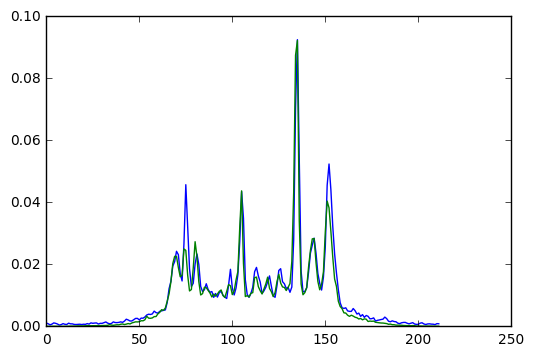

In [63]:
plot(activity[60:272,172,64] *2.3)
plot(activity_recon_Siemens_mlem.data[60:272,172,64])

In [66]:
pet.import_randoms('../../data/PET_data/scans/2015_05_20_deRenzo/randoms.h5')

Uncompression done


[Index](Index.ipynb) - [Back](2015_08_27_03_Presentation_Lab_Cylinder.ipynb) - [Next](2015_08_27_03_Presentation_Lab_Brain.ipynb)